In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Models Based on Distances/Recommendation system Movies/Data/"
"""

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\npath = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Models Based on Distances/Recommendation system Movies/Data/"\n'

In [ ]:
dfmovies = pd.read_csv("https://raw.githubusercontent.com/UlisesGallardo/Datasets/main/Recommendation%20system%20Movies/movies_description.txt",sep='|',header=None)
dfscores = pd.read_csv("https://raw.githubusercontent.com/UlisesGallardo/Datasets/main/Recommendation%20system%20Movies/movies_users.txt",sep='\t',header=None)
dfusers = pd.read_csv("https://raw.githubusercontent.com/UlisesGallardo/Datasets/main/Recommendation%20system%20Movies/users_description.txt",sep='|',header=None)
dfmovies.head()

0                  1            2   3   \
0   1   Toy Story (1995)  01-Jan-1995 NaN   
1   2   GoldenEye (1995)  01-Jan-1995 NaN   
2   3  Four Rooms (1995)  01-Jan-1995 NaN   
3   4  Get Shorty (1995)  01-Jan-1995 NaN   
4   5     Copycat (1995)  01-Jan-1995 NaN   

                                                  4   5   6   7   8   9   ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   

   14  15  16  17  18  19  20  21  22  23  
0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   1   0   0  
2   0   0   0   0   0   0   0   1   0   0  
3   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   1   0   0  

[5 rows x 24 columns]

In [ ]:
nusers = len(dfusers.values)
nmovies = len(dfmovies.values)
print('nusers',nusers)
print('nmovies',nmovies)

nusers 943
nmovies 1682


In [ ]:
evaluations = np.zeros((nmovies,nusers))+3
evaluations[ dfscores.values[:,1]-1, dfscores.values[:,0]-1 ] = dfscores.values[:,2]

dfevaluations = pd.DataFrame(evaluations,index=dfmovies.values[:,1],columns=np.arange(nusers)+1)
dfevaluations

1    2    3    4    5    6    7    \
Toy Story (1995)                           5.0  4.0  3.0  3.0  4.0  4.0  3.0   
GoldenEye (1995)                           3.0  3.0  3.0  3.0  3.0  3.0  3.0   
Four Rooms (1995)                          4.0  3.0  3.0  3.0  3.0  3.0  3.0   
Get Shorty (1995)                          3.0  3.0  3.0  3.0  3.0  3.0  5.0   
Copycat (1995)                             3.0  3.0  3.0  3.0  3.0  3.0  3.0   
...                                        ...  ...  ...  ...  ...  ...  ...   
Mat' i syn (1997)                          3.0  3.0  3.0  3.0  3.0  3.0  3.0   
B. Monkey (1998)                           3.0  3.0  3.0  3.0  3.0  3.0  3.0   
Sliding Doors (1998)                       3.0  3.0  3.0  3.0  3.0  3.0  3.0   
You So Crazy (1994)                        3.0  3.0  3.0  3.0  3.0  3.0  3.0   
Scream of Stone (Schrei aus Stein) (1991)  3.0  3.0  3.0  3.0  3.0  3.0  3.0   

                                           8    9    10   ...  934  935  936  \
Toy Story (1995)                           3.0  3.0  4.0  ...  2.0  3.0  4.0   
GoldenEye (1995)                           3.0  3.0  3.0  ...  4.0  3.0  3.0   
Four Rooms (1995)                          3.0  3.0  3.0  ...  3.0  3.0  4.0   
Get Shorty (1995)                          3.0  3.0  4.0  ...  5.0  3.0  3.0   
Copycat (1995)                             3.0  3.0  3.0  ...  3.0  3.0  3.0   
...                                        ...  ...  ...  ...  ...  ...  ...   
Mat' i syn (1997)                          3.0  3.0  3.0  ...  3.0  3.0  3.0   
B. Monkey (1998)                           3.0  3.0  3.0  ...  3.0  3.0  3.0   
Sliding Doors (1998)                       3.0  3.0  3.0  ...  3.0  3.0  3.0   
You So Crazy (1994)                        3.0  3.0  3.0  ...  3.0  3.0  3.0   
Scream of Stone (Schrei aus Stein) (1991)  3.0  3.0  3.0  ...  3.0  3.0  3.0   

                                           937  938  939  940  941  942  943  
Toy Story (1995)                           3.0  4.0  3.0  3.0  5.0  3.0  3.0  
GoldenEye (1995)                           3.0  3.0  3.0  3.0  3.0  3.0  5.0  
Four Rooms (1995)                          3.0  3.0  3.0  3.0  3.0  3.0  3.0  
Get Shorty (1995)                          3.0  3.0  3.0  2.0  3.0  3.0  3.0  
Copycat (1995)                             3.0  3.0  3.0  3.0  3.0  3.0  3.0  
...                                        ...  ...  ...  ...  ...  ...  ...  
Mat' i syn (1997)                          3.0  3.0  3.0  3.0  3.0  3.0  3.0  
B. Monkey (1998)                           3.0  3.0  3.0  3.0  3.0  3.0  3.0  
Sliding Doors (1998)                       3.0  3.0  3.0  3.0  3.0  3.0  3.0  
You So Crazy (1994)                        3.0  3.0  3.0  3.0  3.0  3.0  3.0  
Scream of Stone (Schrei aus Stein) (1991)  3.0  3.0  3.0  3.0  3.0  3.0  3.0  

[1682 rows x 943 columns]

In [ ]:
X = evaluations
model = MDS(n_components=2)
X2 = model.fit_transform(X)

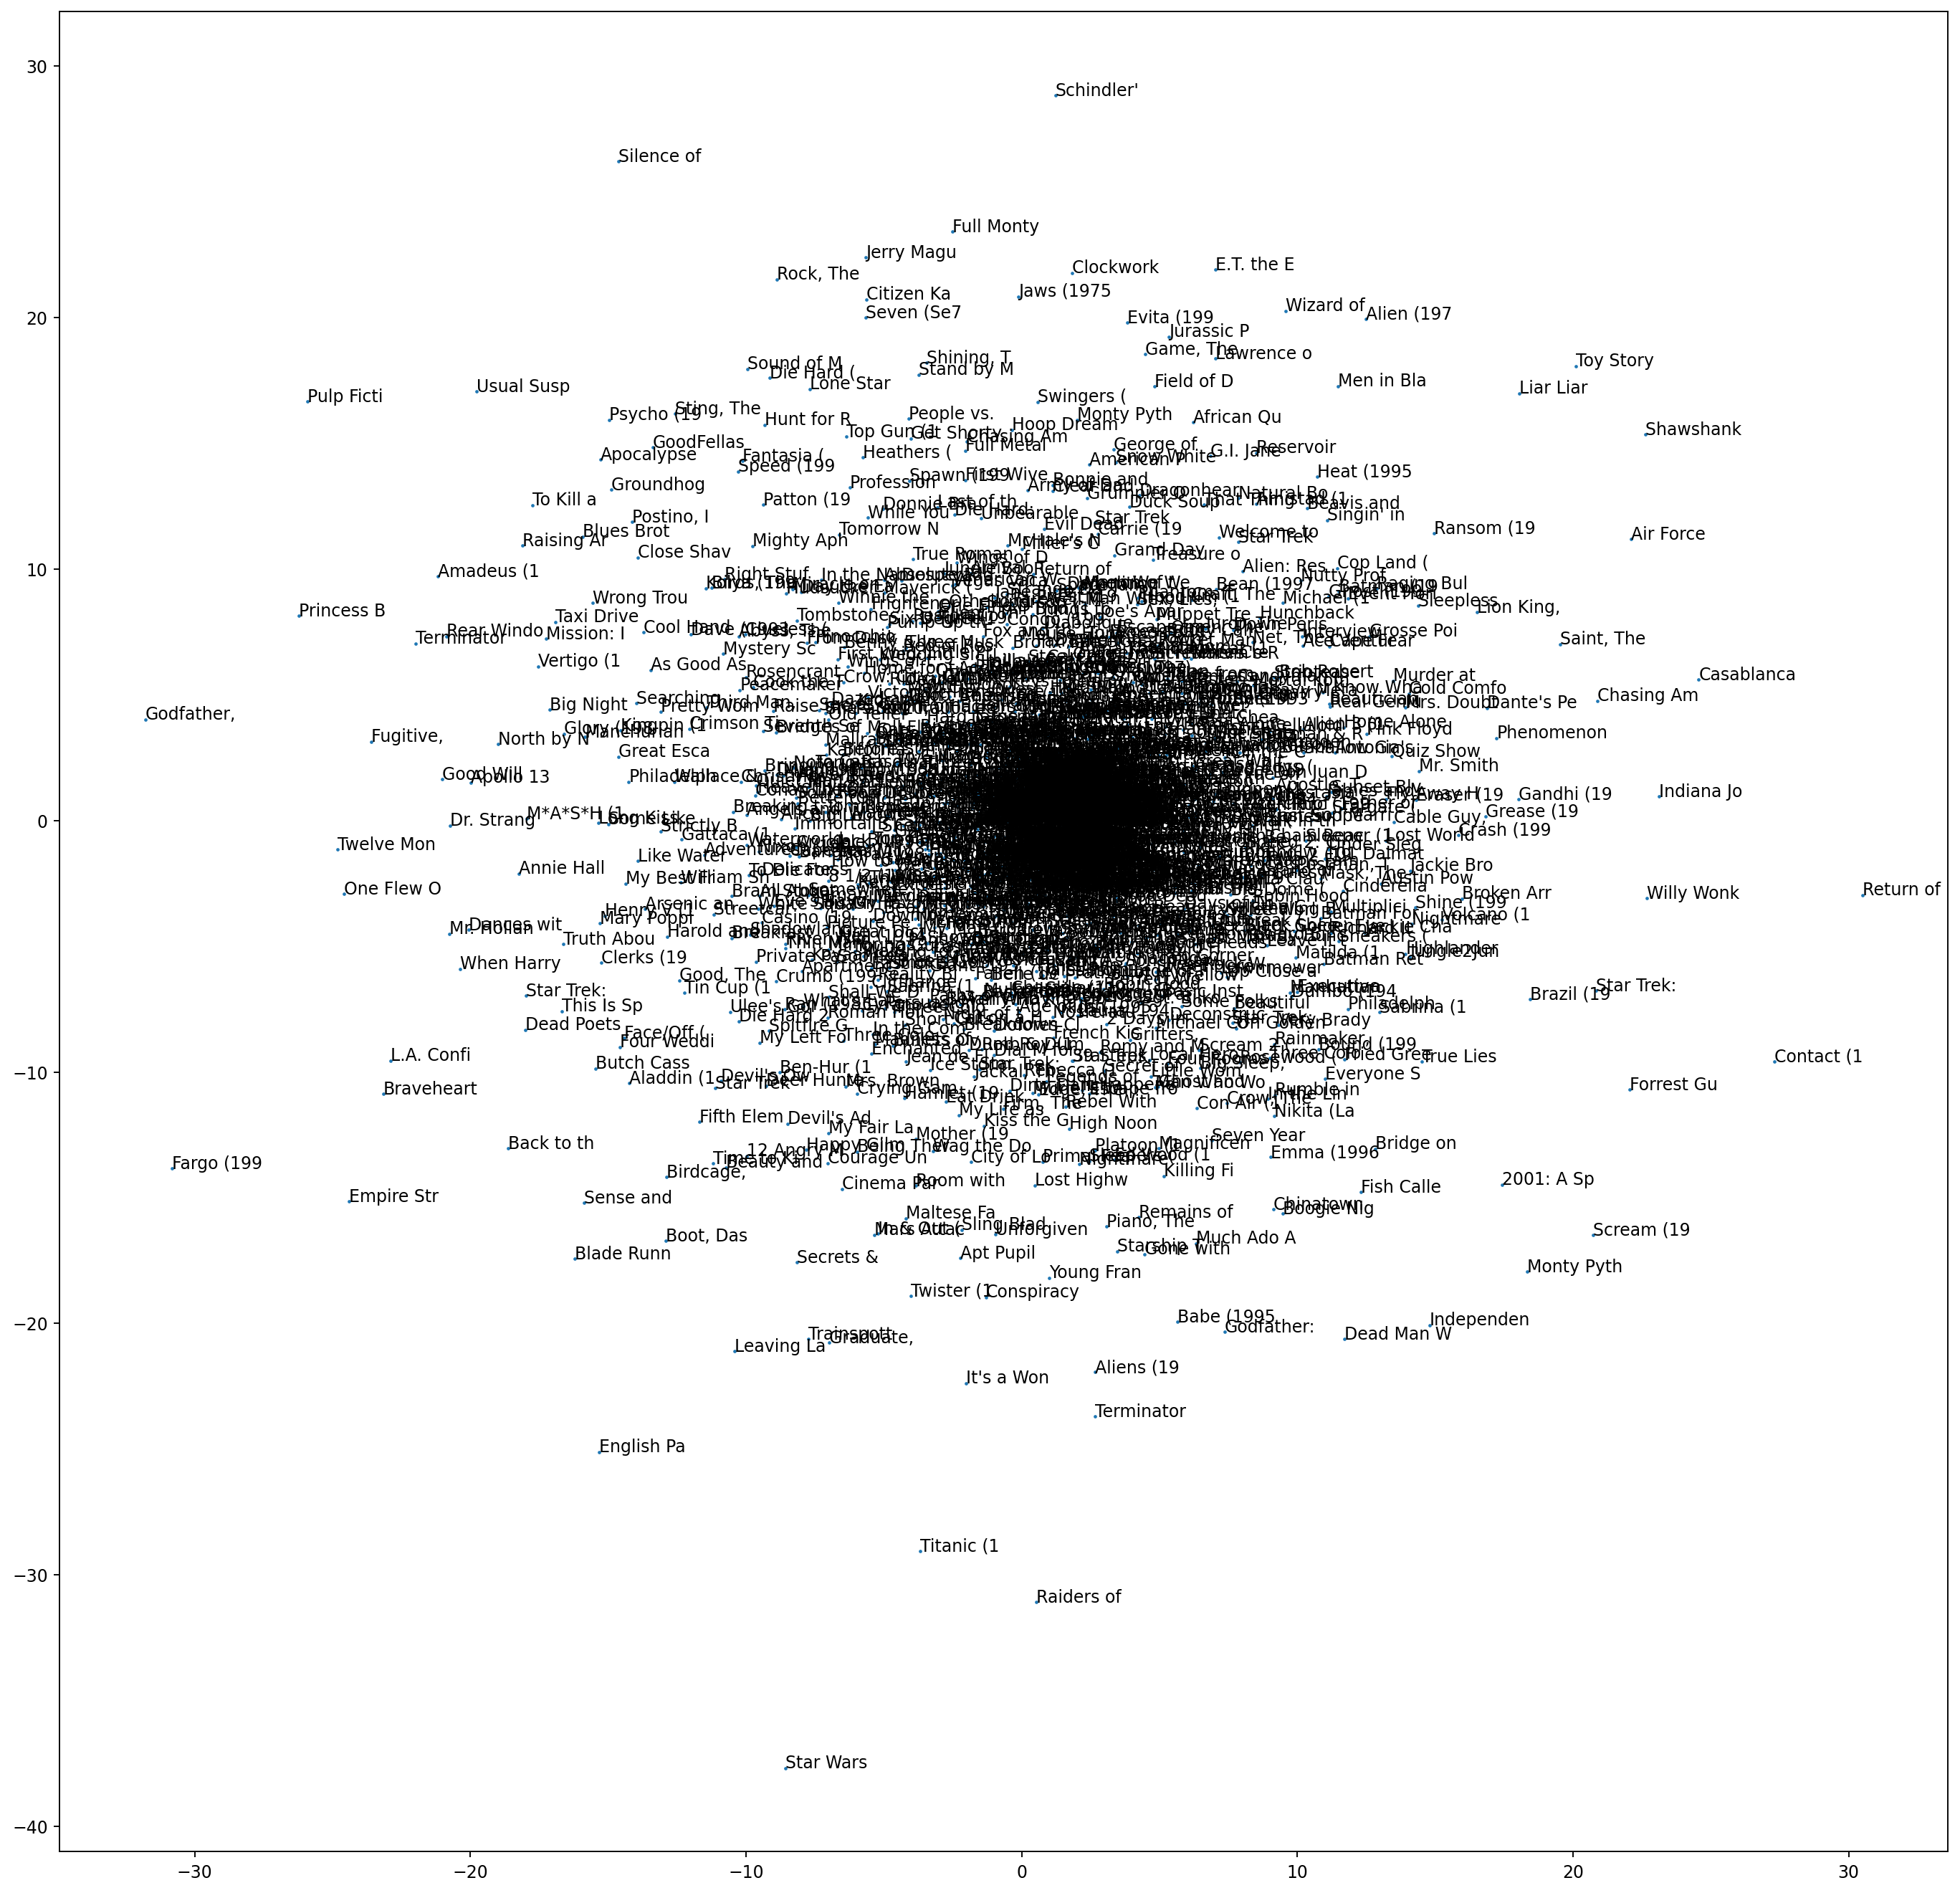

In [ ]:
nmovies = len(dfmovies.values)
tmovies = np.array(list(dfevaluations.index))
idusers = dfevaluations.columns
for i in range(nmovies):
    tmovies[i] = tmovies[i][:10]

plt.figure(figsize=(20,20), dpi = 170)
plt.scatter(X2[:,0],X2[:,1],s=1)
for i in range(len(X2)):
    plt.text(X2[i,0],X2[i,1], tmovies[i])
#plt.xlabel(np.round(exp_var[0],3)*100)
#plt.ylabel(np.round(exp_var[1],3)*100)
plt.show()

In [78]:
class myKNeighborsClassifier:
  def __init__(self, k=5):
      self.k = k
      self.Xtrain = None
      self.Ytrain = None
  def fit(self,Xtrain,Ytrain):
      self.Xtrain = Xtrain
      self.Ytrain = Ytrain
  def predict(self,X):
      result = []
      for x in X: 
        distancias = []
        idx = np.where(self.Ytrain == x)[0]
        print(np.where(self.Ytrain == x))
        print(idx)
        xx = self.Xtrain[idx]
        for index, AnotherMovie in enumerate(self.Xtrain):
            if index!= idx:
              a = np.array(self.Xtrain[idx])
              b = np.array(AnotherMovie)
              dis = np.linalg.norm(a-b)
              distancias.append((dis,self.Ytrain[index]))
        distancias.sort(key = lambda x: x[0])
        most_frec = []
        for index, values in enumerate(distancias):
          if index >= self.k: break
          most_frec.append(values[1])
        result.append(most_frec)
      return result

In [79]:
movies = ['Toy Story (1995)'] 

Model = myKNeighborsClassifier()
Model.fit(X2,dfmovies.values[:,1])
Ypredicted = Model.predict(movies)

DF = pd.DataFrame(Ypredicted)
DF

(array([0]),)
[0]


0                                 1                     2  \
0  Liar Liar (1997)  Shawshank Redemption, The (1994)  Air Force One (1997)   

              3              4  
0  Alien (1979)  Ransom (1996)

In [ ]:
import sys, threading
sys.setrecursionlimit(10**7) # max depth of recursion
threading.stack_size(2**27)  # new thread will get stack of such size

hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])

plt.figure(figsize=(100,100),dpi=200)
Z = hierarchy.linkage(X)
dn = hierarchy.dendrogram(Z, labels=tmovies, color_threshold=11)
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])